In [53]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns 
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_error, r2_score , accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# PR y F1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek


from sklearn import metrics
from collections import Counter 

data = pd.read_csv("output/pid.csv")
data


,x,y,z,e,p,px,py,pz,m,ch,pid,pt,eta
0,0.0,0.000000e+00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.00,0.00
1,0.0,7.214665e+28,0.00,7.214692e+28,0.00,0.00,0.00,0.00,7.004710e+28,0.0,0.0,0.00,0.00
2,200.0,7.214665e+28,0.00,7.214692e+28,0.00,0.00,0.00,0.00,7.004710e+28,0.0,0.0,0.00,0.00
3,396.0,8.970000e+02,2.00,6.010000e+02,1007.00,1007.00,1007.00,0.00,7.004710e+28,0.0,0.0,1007.00,0.00
4,-14.0,-4.390000e+00,-32.19,9.500000e-01,0.15,-0.07,-0.07,-0.13,9.380000e-01,1.0,1.0,0.07,-1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48284,9.0,-4.916000e+01,192.10,2.310000e+00,2.31,0.12,0.12,2.23,1.380000e-01,0.0,101.0,0.58,2.06
48285,-165.0,-6.009000e+01,-38.16,5.400000e-01,0.52,-0.47,-0.47,-0.12,1.380000e-01,1.0,101.0,0.50,-0.24
48286,17.0,9.300000e+00,-195.48,1.510000e+00,1.50,0.13,0.13,-1.49,1.380000e-01,0.0,101.0,0.16,-2.95
48287,-25.0,-6.171000e+01,171.27,3.600000e-01,0.34,-0.05,-0.05,0.30,1.380000e-01,-1.0,101.0,0.15,1.48


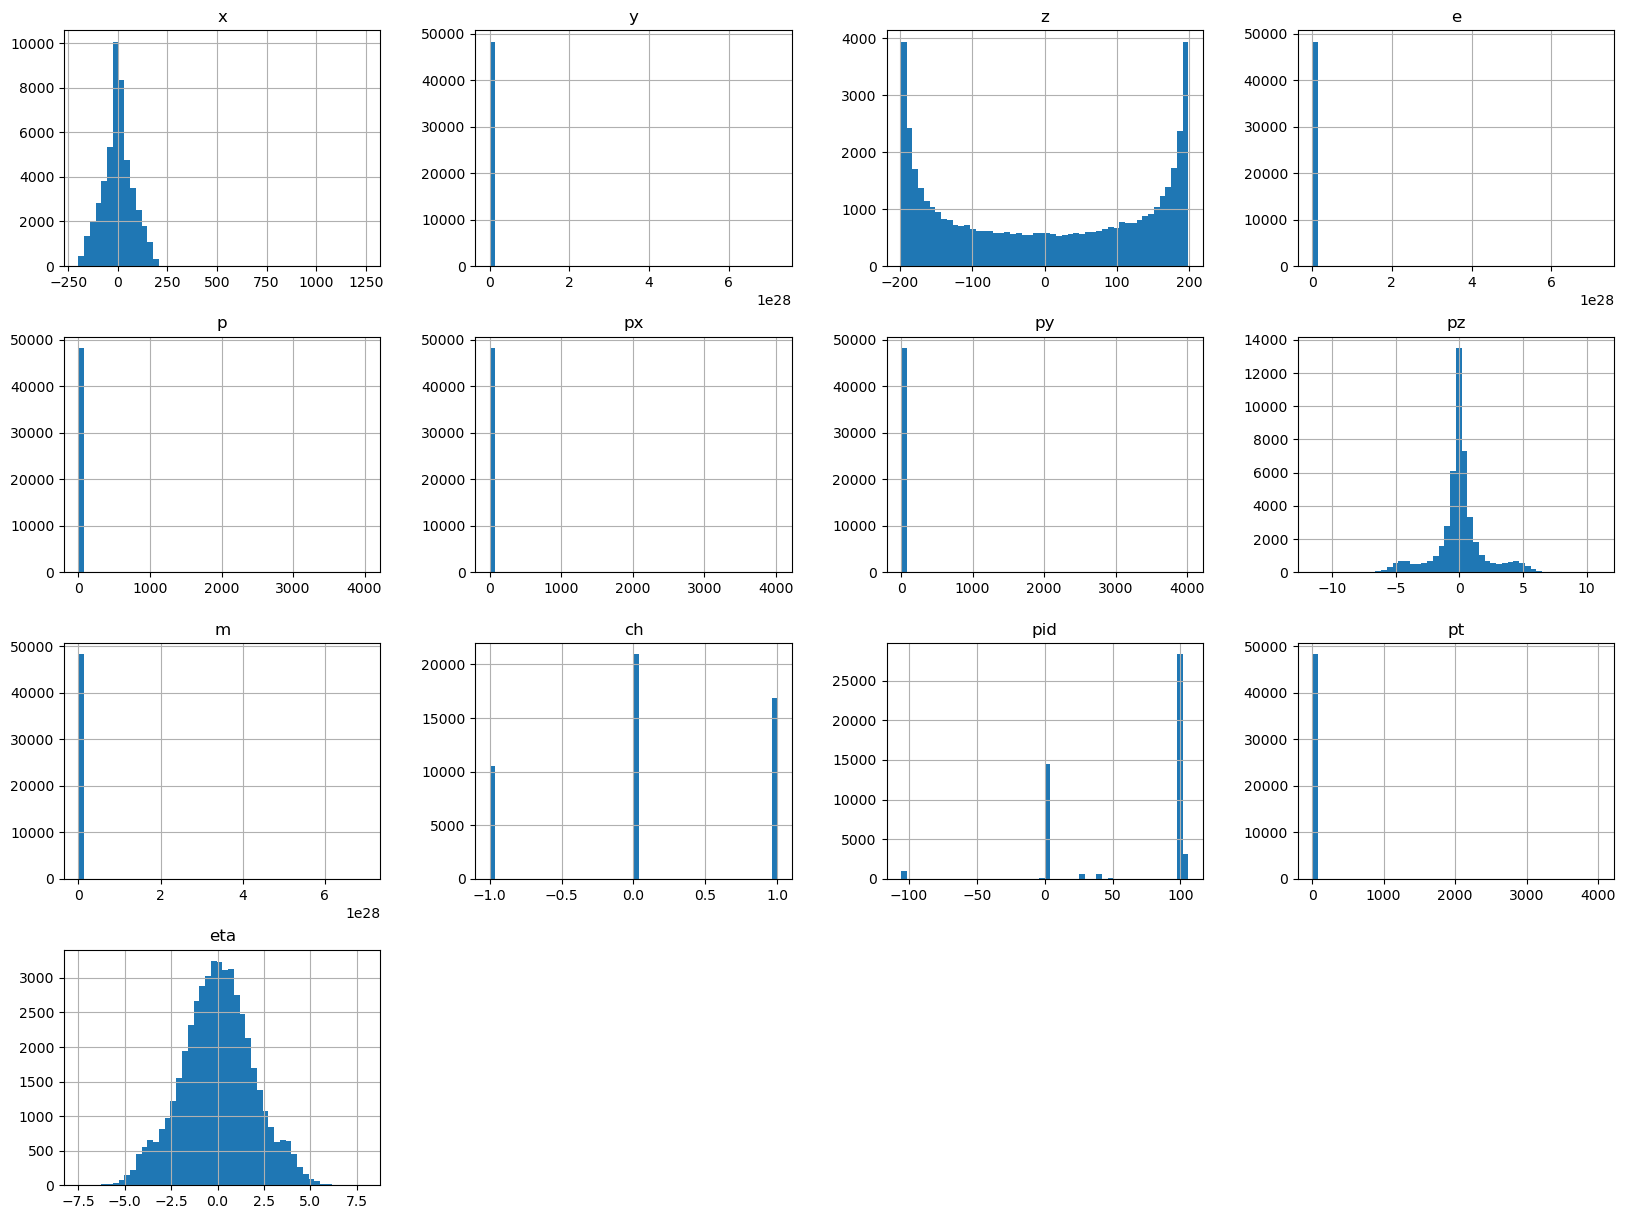

In [54]:
data.hist(bins=50, figsize=(20,15))
plt.show()

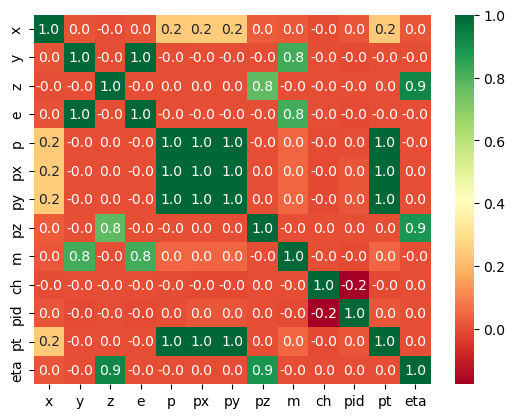

In [55]:
def corr_matrix(data): #matriz de correlación
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, fmt=".1f", cbar=True, cmap="RdYlGn")

corr_matrix(data)

In [56]:
print(pd.value_counts(data['pid'], sort = True))

 101.0    28305
 1.0      14445
 106.0     2317
-106.0     1019
 102.0      879
 40.0       630
 27.0       575
 49.0        54
-1.0         48
-40.0        10
 0.0          4
-49.0         2
-27.0         1
Name: pid, dtype: int64


In [57]:
data.loc[data['pid'] != 27, "pid"] = 0
data.loc[data['pid'] == 27, "pid"] = 1



In [58]:
#dataset = data[(data["pid"] == 101) | (data["pid"] == 1) | (data["pid"] == 106) |  (data["pid"] == 27) ]#proton, pions, K, lambda
#dataset = data[(data["pid"] == 101) | (data["pid"] == 1)| (data["pid"] == 106)]
dataset = data[4:]
print(pd.value_counts(dataset['pid'], sort = True))

0.0    47710
1.0      575
Name: pid, dtype: int64


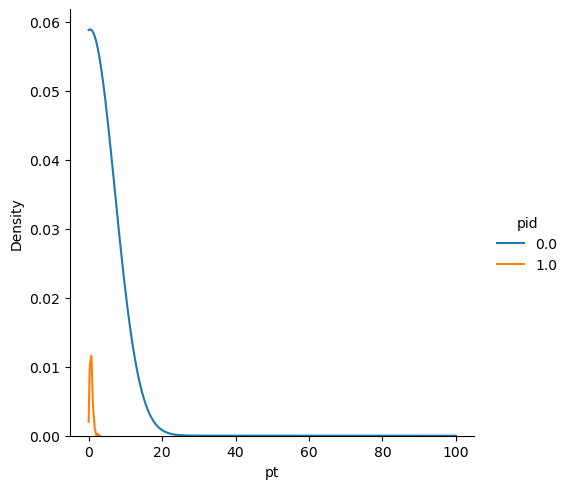

In [59]:

sns.displot(dataset, x="pt", hue="pid", kind="kde",clip=(0.0, 100.0)) 

In [60]:
#sns.pairplot(dataset, hue='pid', height=2.25)# hue separar por alguna categoría

In [61]:
Y = dataset['pid']
X = dataset.drop('pid',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



# LinearRegression

In [62]:
#Crear modelo de regresión lineal simple con el conjunto de entrenamiento
regresion_lineal = LinearRegression() # crear lel objeto de Regresión Linear

#Ajustar el modelo usando el modelo de la clase (debe tener mismo numero de filas tanto x como y)
regresion_lineal.fit(X_train, Y_train)

#Creando un vector de predicciones, se debe tomar solo los valores independientes
Y_pred = regresion_lineal.predict(X_test)

# Error Cuadrado Medio

print("Mean squared error: %.2f" % np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Coefficient of determination: %.2f" % r2_score(Y_test, Y_pred))



Mean squared error: 0.10
Coefficient of determination: 0.06


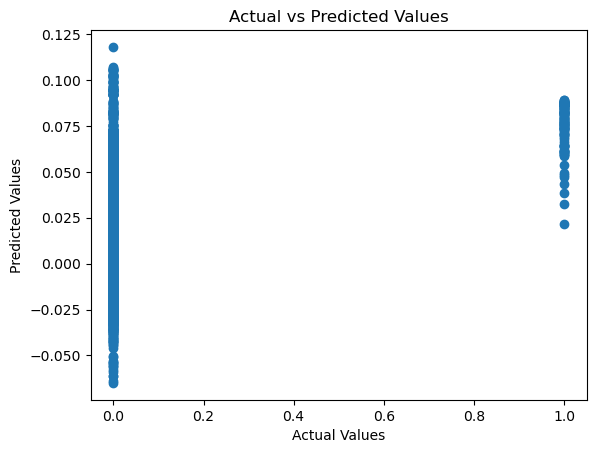

In [63]:
# Create scatter plot with actual and predicted values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Regresión Logística

In [64]:
#lr = LogisticRegression()
lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print('beta_0:',lr.intercept_)
print('beta_1:',lr.coef_)

beta_0: [-3.63011115]
beta_1: [[-1.48978598e-04 -1.62392631e-04  2.34698745e-04  9.16008067e-01
  -1.08277509e+00 -4.30490019e-02 -4.30490019e-02 -5.72612063e-02
   4.23093396e+00 -9.39090684e-01  5.78072654e-01  4.22589134e-02]]


/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [65]:
def run_model(X_train, X_test, Y_train, Y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    #clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf_base.fit(X_train, Y_train)
    return clf_base

In [66]:
def show_result(X_test, Y_test, Y_pred):
    #Generamos un clasificador sin entrenar ,  0 a todo
    ns_probs = [0 for _ in range(len(Y_test))]
    # Predecimos las probabilidades entrenando con lr
    lr_probs = model.predict_proba(X_test)
    #Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
    lr_probs = lr_probs[:, 1]
    # Calculamos el AUC
    ns_auc = roc_auc_score(Y_test, ns_probs)
    lr_auc = roc_auc_score(Y_test, lr_probs)
    #print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
    # Calculamos las curvas ROC
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)

    conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap = 'Blues_r')
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(Y_test, Y_pred))

    lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
    lr_f1, lr_auc = f1_score(Y_test, Y_pred), auc(lr_recall, lr_precision)
    #print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
    print('Regresión Logística: auc=%.3f f1=%.3f ' % (lr_auc, lr_f1))
    no_train = len(Y_test[Y_test==1]) / len(Y_test)
    plt.figure(figsize=(15,10))

    plt.subplot(2,2,1)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
    plt.xlabel('Falsos Positivos')
    plt.ylabel('Verdaderos Positivos')
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot([0, 1], [no_train, no_train], linestyle='--', label='Sin entrenar')
    plt.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
    #Etiquetas de ejes
    plt.xlabel('Sensibilidad')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()



/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


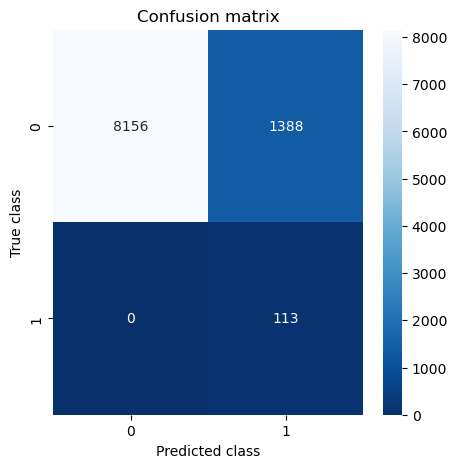

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      9544
         1.0       0.08      1.00      0.14       113

    accuracy                           0.86      9657
   macro avg       0.54      0.93      0.53      9657
weighted avg       0.99      0.86      0.91      9657

Regresión Logística: auc=0.007 f1=0.140 


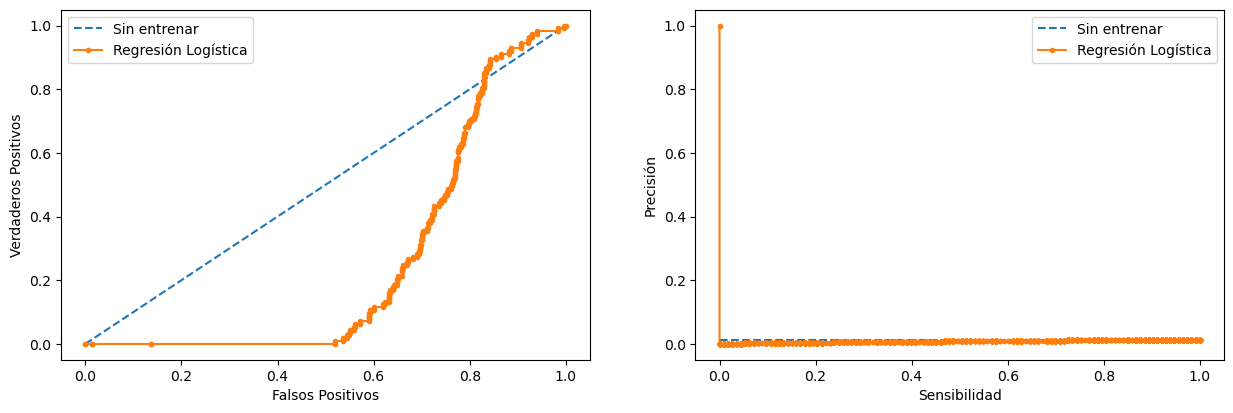

In [67]:
model = run_model(X_train, X_test, Y_train, Y_test)
pred_y = model.predict(X_test)
show_result(X_test, Y_test, Y_pred)

before resampling Counter({0.0: 38166, 1.0: 462})
after resampling Counter({0.0: 38166, 1.0: 38166})


/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


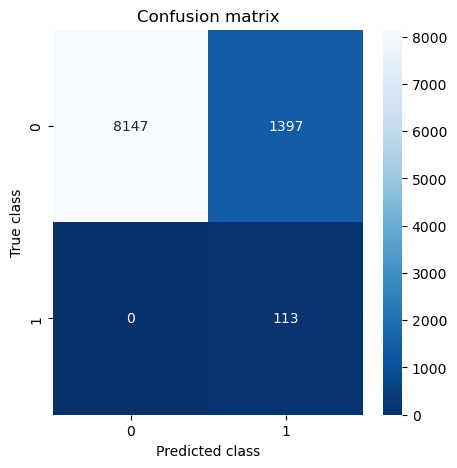

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      9544
         1.0       0.07      1.00      0.14       113

    accuracy                           0.86      9657
   macro avg       0.54      0.93      0.53      9657
weighted avg       0.99      0.86      0.91      9657

Regresión Logística: auc=0.314 f1=0.139 


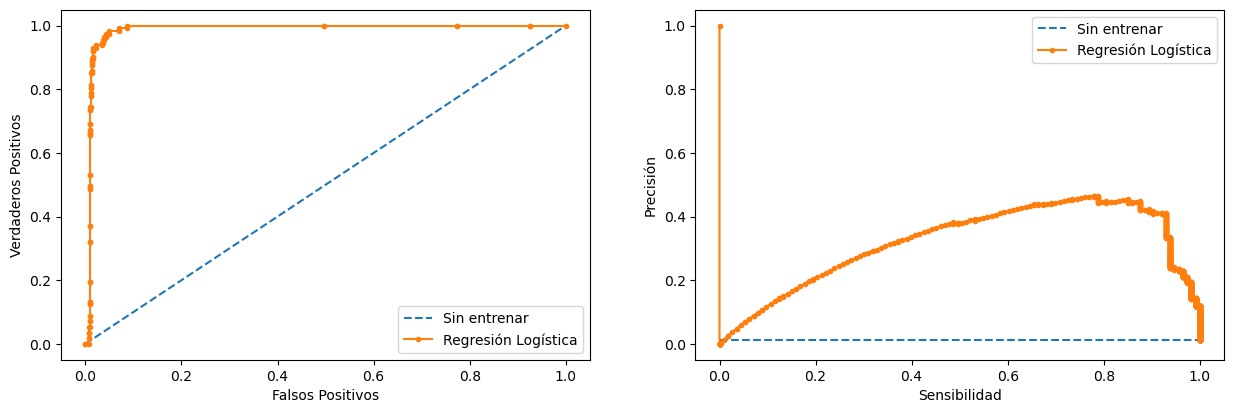

In [68]:
os_us = SMOTE()
X_train_res, Y_train_res = os_us.fit_resample(X_train, Y_train)
 
print ("before resampling {}".format(Counter(Y_train)))
print ("after resampling {}".format(Counter(Y_train_res)))
 
model = run_model(X_train_res, X_test, Y_train_res, Y_test)
Y_pred = model.predict(X_test)
show_result(X_test,Y_test, Y_pred)

# K-vecinos

In [77]:

# Create a KNeighborsRegressor instance with the desired number of neighbors (k)
k = 5  # You can adjust this value
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the model to the training data
knn_regressor.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = knn_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)


print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")


Mean Squared Error: 0.0134
R-squared (R2) Score: -0.1565


# TODO
1. Normalizar
2. Balancear